#  CONVOLUTIONAL NEURAL NETWORK

### Loads the dependencies


In [3]:
import os          
import cv2                                 
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from sklearn.metrics import *         
import matplotlib.pyplot as plt 
import sklearn.model_selection as model_selection

2022-12-15 14:17:52.308184: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-15 14:17:52.630689: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-12-15 14:17:52.630716: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-15 14:17:53.748509: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerr

### Load the raw data

In [4]:
def load_data(dataset):
    class_names = []
    images = []
    labels = []  
    for folder in os.listdir(dataset):
        class_names.append(folder)    
    class_names_label = {class_name:i for i, class_name in enumerate(class_names)} 
    print("Loading Dataset {}".format(dataset))
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
            img_path = os.path.join(os.path.join(dataset, folder), file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            IMAGE_SIZE = (224, 224)
            image = cv2.resize(image, IMAGE_SIZE)
            images.append(image)
            labels.append(label)
    return images, labels , class_names

dataset = '../datasets/'
images, labels, class_names = load_data(dataset)

Loading Dataset ../datasets/


100%|███████████████████████████████████████████| 56/56 [00:01<00:00, 51.59it/s]


### Normalizing

In [5]:
images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32') 
images = images/255.0

### Train Test Split

In [6]:
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101) 

###  Build the model_RR 

In [7]:
model_RR = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

2022-12-15 14:19:41.167123: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 14:19:41.167521: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-12-15 14:19:41.167626: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-12-15 14:19:41.167820: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not lo

###  Compile the model_RR 

In [8]:
model_RR.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

###  Train the  model_RR

In [ ]:
history_RR = model_RR.fit(train_images, train_labels, batch_size=128, epochs = 5, validation_split = 0.2)

Epoch 1/5


2022-12-15 14:19:52.307518: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 706879488 exceeds 10% of free system memory.
2022-12-15 14:19:54.294423: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 807469056 exceeds 10% of free system memory.
2022-12-15 14:19:54.969290: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 201867264 exceeds 10% of free system memory.
2022-12-15 14:19:55.154479: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 194658304 exceeds 10% of free system memory.


### Evaluate the  model_RR

In [8]:
model_RR_results = model_RR.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 79ms/step - loss: 1.2518 - accuracy: 0.6213


### Predictions model_RR

In [9]:
predictions = np.argmax(model_RR.predict(test_images), axis = 1)
actual = test_labels

12/12 [==============================] - 1s 79ms/step


### Confusion matrix model_RR

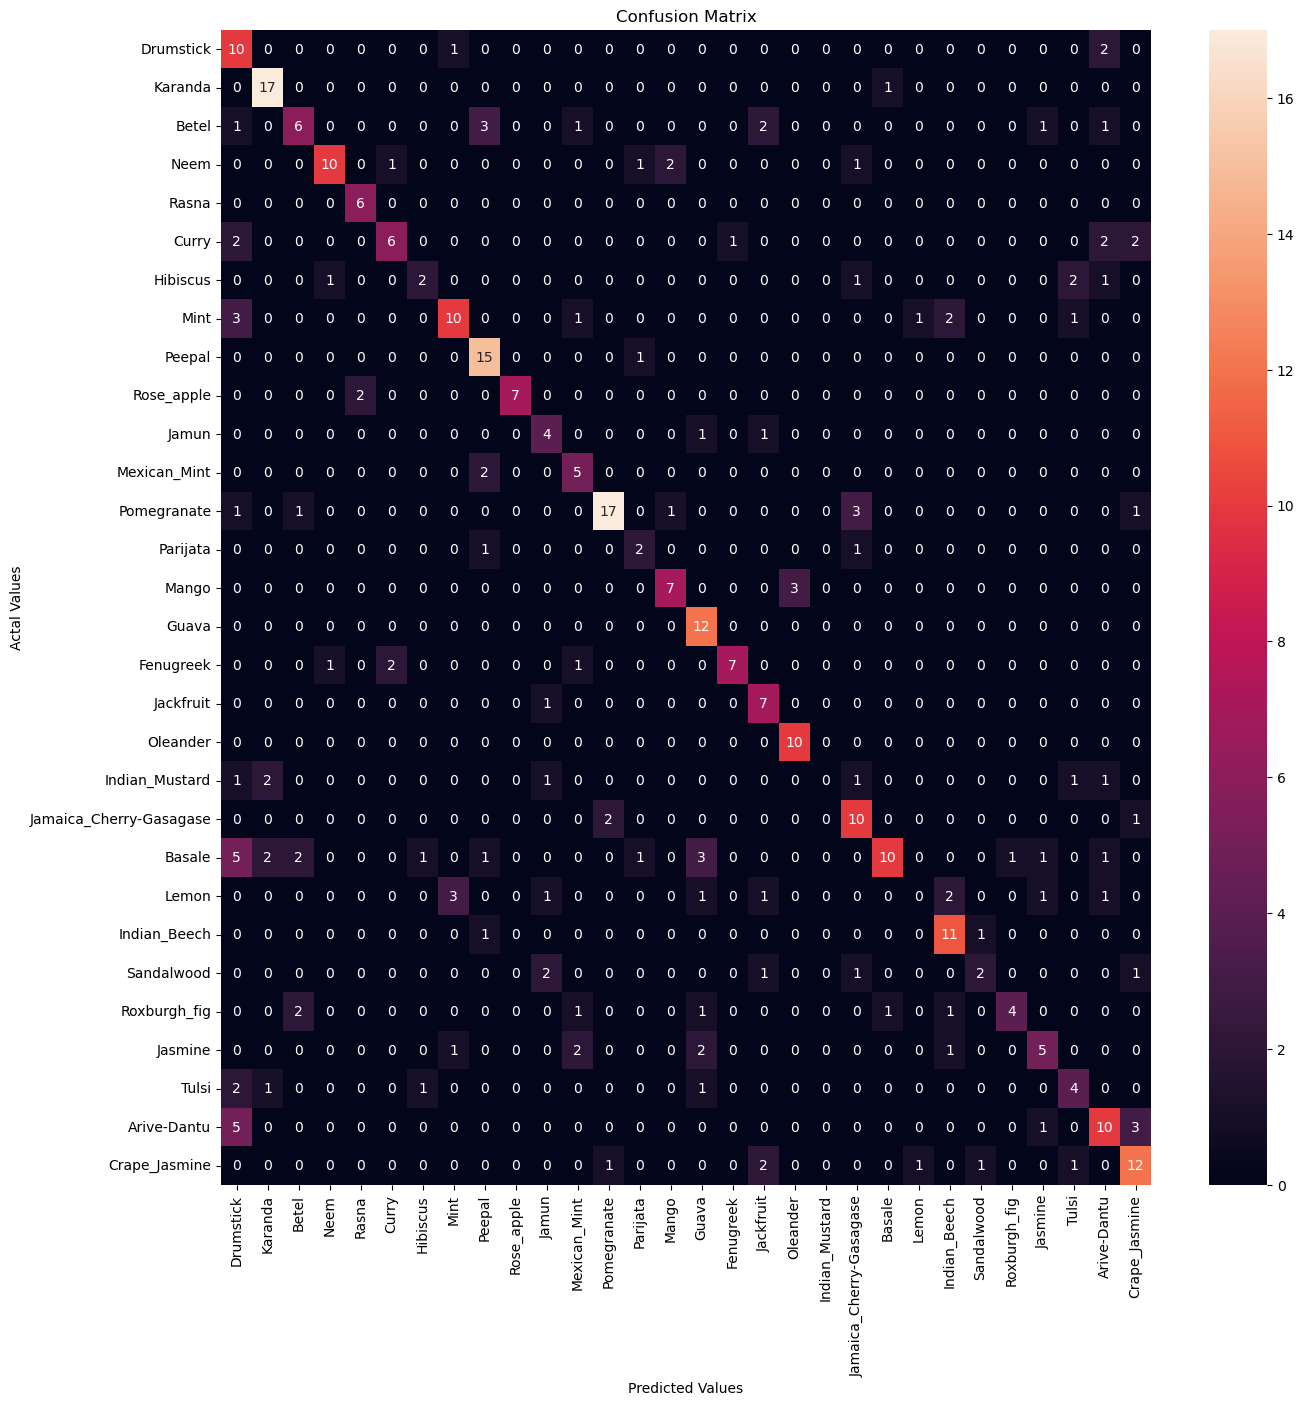

In [10]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(actual,predictions),index = class_names, columns =class_names)

plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [34]:
import keras
from keras_applications.resnext import ResNeXt50

model_ResNeXt50 = ResNeXt50(weights='imagenet',backend=keras.backend,layers=keras.layers,models=keras.models,utils=keras.utils)

In [35]:
model_ResNeXt50.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_ResNeXt50 = model.fit(train_images, train_labels, batch_size=128, epochs = 5, validation_split = 0.2)

Epoch 1/5


In [1]:
model_ResNeXt50 = model_ResNeXt50.evaluate(test_images, test_labels)

NameError: name 'model_ResNeXt50' is not defined

In [29]:
predictions = np.argmax(model_ResNeXt50.predict(test_images), axis = 1)
actual = test_labels

ValueError: in user code:

    File "/home/ragu/anaconda3/lib/python3.7/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/home/ragu/anaconda3/lib/python3.7/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ragu/anaconda3/lib/python3.7/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/home/ragu/anaconda3/lib/python3.7/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/home/ragu/anaconda3/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ragu/anaconda3/lib/python3.7/site-packages/keras/engine/input_spec.py", line 296, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "resnext50" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 150, 150, 3)


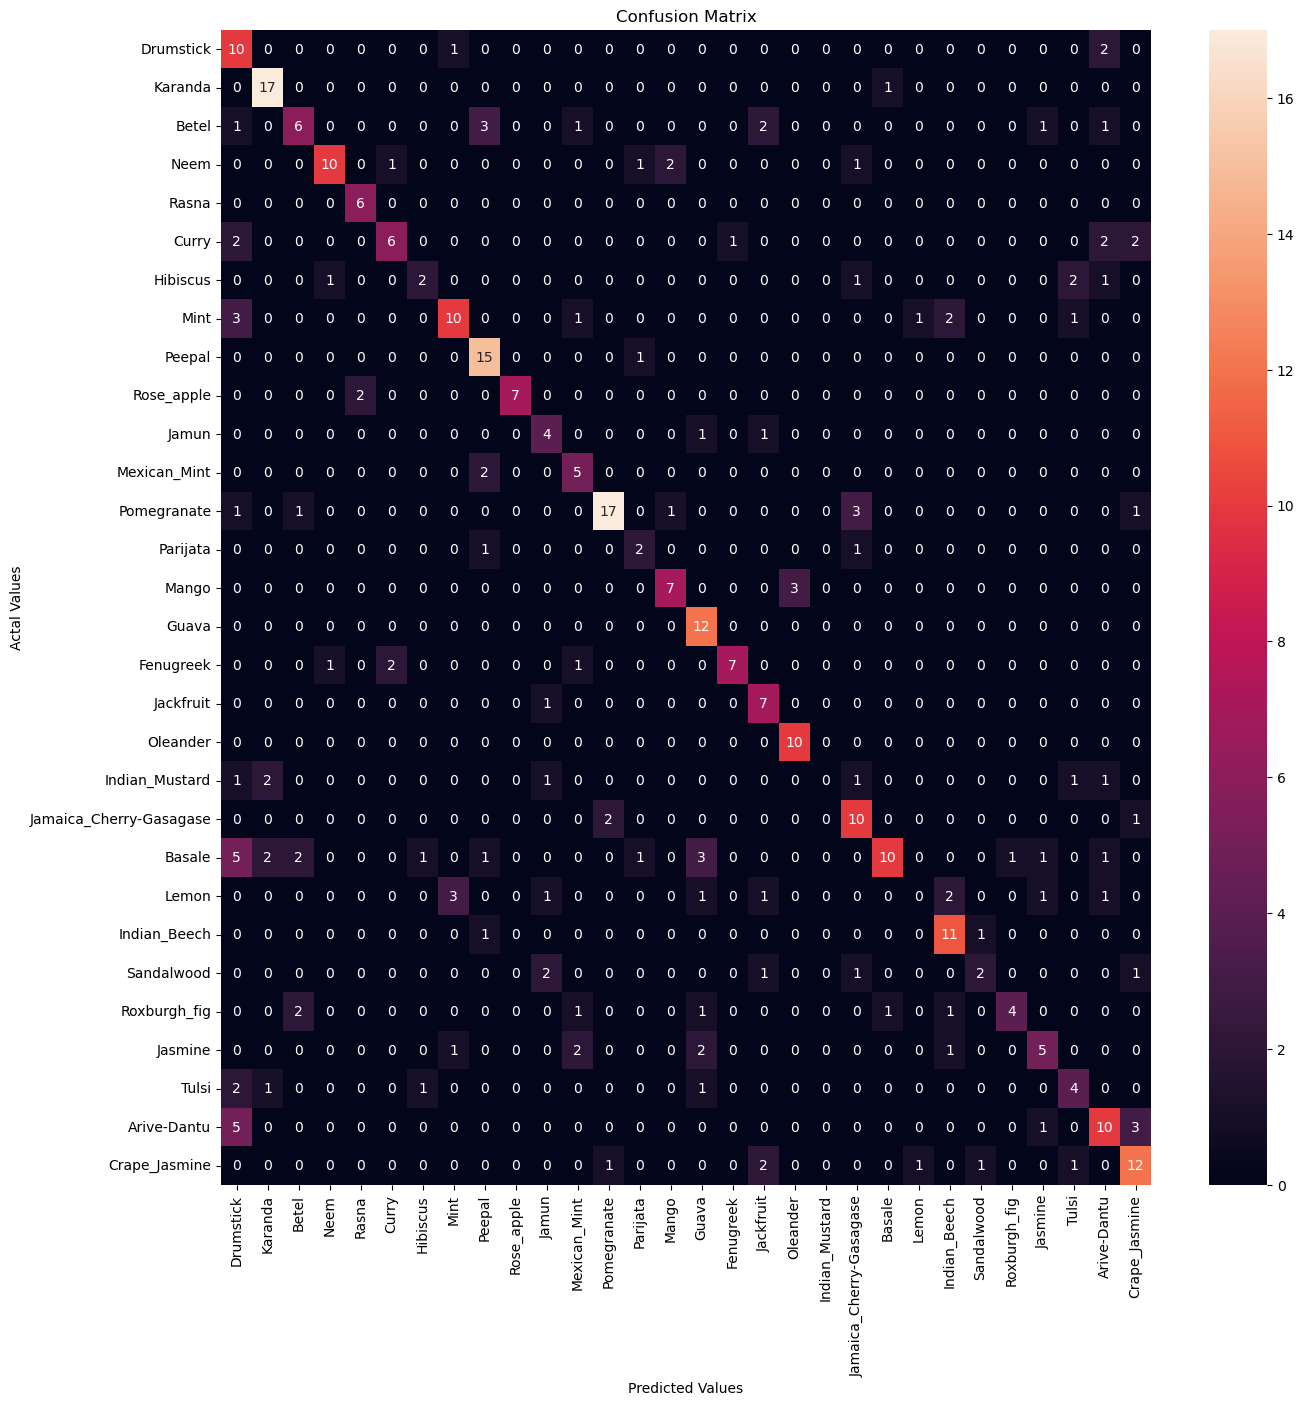

In [30]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(actual,predictions),index = class_names, columns =class_names)

plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [4]:
from keras.applications.resnet import ResNet101 
import tensorflow as tf

tf.keras.backend.clear_session
model=VGG19()
model.summary()


tf.keras.utils.plot_model(model,show_shapes=True)
visualkeras.layered_view(model,legend=True)


NameError: name 'VGG19' is not defined

##  Comparison

###  Create a dataframe

In [ ]:
qnn_history.history
accuracy = pd.DataFrame()

accuracy['QNN_accuracy']  = qnn_history.history['hinge_accuracy']
accuracy['QNN_val_accuracy'] = qnn_history.history['val_hinge_accuracy']

accuracy['CNN_accuracy']  = cnn_history.history['accuracy']
accuracy['CNN_val_accuracy'] = cnn_history.history['val_accuracy']

accuracy['CNN_accuracy']  = cnn_history.history['accuracy']
accuracy['CNN_val_accuracy'] = cnn_history.history['val_accuracy']

accuracy['CNN_accuracy']  = cnn_history.history['accuracy']
accuracy['CNN_val_accuracy'] = cnn_history.history['val_accuracy']

accuracy['CNN_accuracy']  = cnn_history.history['accuracy']
accuracy['CNN_val_accuracy'] = cnn_history.history['val_accuracy']

accuracy['CNN_accuracy']  = cnn_history.history['accuracy']
accuracy['CNN_val_accuracy'] = cnn_history.history['val_accuracy']

accuracy['CNN_accuracy']  = cnn_history.history['accuracy']
accuracy['CNN_val_accuracy'] = cnn_history.history['val_accuracy']

accuracy['CNN_accuracy']  = cnn_history.history['accuracy']
accuracy['CNN_val_accuracy'] = cnn_history.history['val_accuracy']

accuracy['CNN_accuracy']  = cnn_history.history['accuracy']
accuracy['CNN_val_accuracy'] = cnn_history.history['val_accuracy']

accuracy['CNN_accuracy']  = cnn_history.history['accuracy']
accuracy['CNN_val_accuracy'] = cnn_history.history['val_accuracy']

accuracy['CNN_accuracy']  = cnn_history.history['accuracy']
accuracy['CNN_val_accuracy'] = cnn_history.history['val_accuracy']


print("Quantum CNN accuracy and  Classical CNN accuracy\n")
print(accuracy)
print("\nQuantum CNN loss and  Classical CNN loss\n")
print(loss)

### Comparison using line chart

In [ ]:
def plot_accuracy():
    plt.plot(accuracy['QNN_accuracy'],'b--',label = 'QNN_accuracy')
    plt.plot(accuracy['QNN_val_accuracy'],'r--',label = 'QNN_val_accuracy')
    plt.plot(accuracy['CNN_accuracy'],'g--',label = 'CNN_accuracy')
    plt.plot(accuracy['CNN_val_accuracy'],'y--',label = 'CNN_val_accuracy')
    plt.legend()
    plt.title('Quantum CNN accuracy Vs Classical CNN accuracy')
    plt.show()

In [ ]:
plot_accuracy()

### Comparison using Bar chart

In [ ]:
accuracy =[qnn_results[1],cnn_results[1]]
lable = ["Quantum", "Classical"]
barlist = plt.bar(lable,accuracy)
barlist[0].set_color('b')
barlist[1].set_color('r')
plt.title("Quantum Vs Classical")
plt.show()